# Synthetic data examples

In this Notebook we will build synthetic data suitable to Alphalens analysis. This is useful to understand how Alphalens expects the input to be formatted and also it is a good testing environment to experiment with Alphalens.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import nan
from pandas import (DataFrame, date_range)

from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
#
# build price
#
price_index = date_range(start='2015-1-10', end='2015-2-28')
price_index.name = 'date'
tickers = ['A', 'B', 'C', 'D', 'E', 'F']
data = [[1.0025**i, 1.005**i, 1.00**i, 0.995**i, 1.005**i, 1.00**i]
        for i in range(1, 51)]
base_prices = DataFrame(index=price_index, columns=tickers, data=data)

#
# build factor
#
factor_index = date_range(start='2015-1-15', end='2015-2-13')
factor_index.name = 'date'
factor = DataFrame(index=factor_index, columns=tickers,
                   data=[[3, 4, 2, 1, nan, nan], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2]])
factor_groups = {'A': 'Group1', 'B': 'Group2', 'C': 'Group1', 'D': 'Group2', 'E': 'Group1', 'F': 'Group2'}

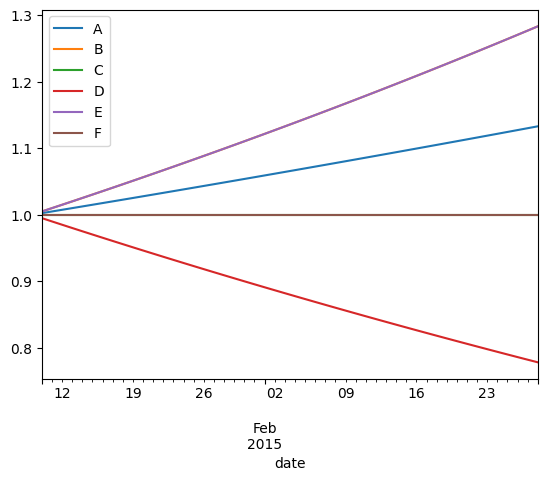

In [3]:
base_prices.plot()
plt.show()

In [4]:
base_prices.head()

A         B    C         D         E    F
date                                                        
2015-01-10  1.002500  1.005000  1.0  0.995000  1.005000  1.0
2015-01-11  1.005006  1.010025  1.0  0.990025  1.010025  1.0
2015-01-12  1.007519  1.015075  1.0  0.985075  1.015075  1.0
2015-01-13  1.010038  1.020151  1.0  0.980150  1.020151  1.0
2015-01-14  1.012563  1.025251  1.0  0.975249  1.025251  1.0

In [5]:
# create artificial intraday prices

today_open = base_prices.copy()
today_open.index += pd.Timedelta('9h30m')

# every day, after 1 hour from open all stocks increase by 0.1%
today_open_1h = today_open.copy()
today_open_1h.index += pd.Timedelta('1h')
today_open_1h += today_open_1h*0.001

# every day, after 3 hours from open all stocks decrease by 0.2%
today_open_3h = today_open.copy()
today_open_3h.index += pd.Timedelta('3h')
today_open_3h -= today_open_3h*0.002

# prices DataFrame will contain all intraday prices
prices = pd.concat([today_open, today_open_1h, today_open_3h]).sort_index()

In [6]:
prices.head(10)

A         B      C         D         E      F
date                                                                     
2015-01-10 09:30:00  1.002500  1.005000  1.000  0.995000  1.005000  1.000
2015-01-10 10:30:00  1.003502  1.006005  1.001  0.995995  1.006005  1.001
2015-01-10 12:30:00  1.000495  1.002990  0.998  0.993010  1.002990  0.998
2015-01-11 09:30:00  1.005006  1.010025  1.000  0.990025  1.010025  1.000
2015-01-11 10:30:00  1.006011  1.011035  1.001  0.991015  1.011035  1.001
2015-01-11 12:30:00  1.002996  1.008005  0.998  0.988045  1.008005  0.998
2015-01-12 09:30:00  1.007519  1.015075  1.000  0.985075  1.015075  1.000
2015-01-12 10:30:00  1.008526  1.016090  1.001  0.986060  1.016090  1.001
2015-01-12 12:30:00  1.005504  1.013045  0.998  0.983105  1.013045  0.998
2015-01-13 09:30:00  1.010038  1.020151  1.000  0.980150  1.020151  1.000

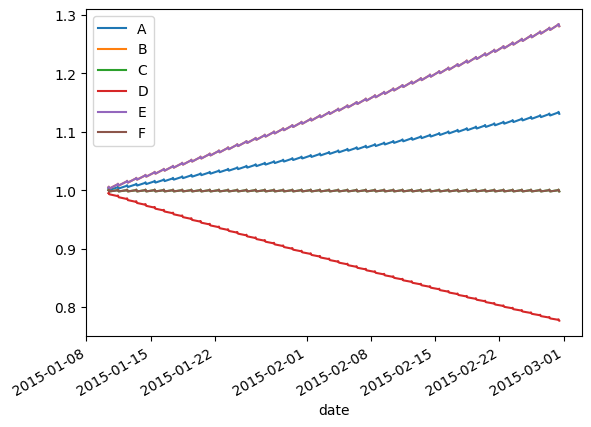

In [7]:
prices.plot()
plt.show()

In [8]:
# Align factor to open price
factor.index += pd.Timedelta('9h30m')
factor = factor.stack()
factor.index = factor.index.set_names(['date', 'asset'])

In [9]:
factor.head(10)

date                 asset
2015-01-15 09:30:00  A        3.0
                     B        4.0
                     C        2.0
                     D        1.0
2015-01-16 09:30:00  A        3.0
                     D        1.0
                     E        4.0
                     F        2.0
2015-01-17 09:30:00  A        3.0
                     B        4.0
dtype: float64

In [10]:
# Period 1: today open to open + 1 hour
# Period 2: today open to open + 3 hours
# Period 3: today open to next day open
# Period 6: today open to 2 days open

factor_data = get_clean_factor_and_forward_returns(
    factor,
    prices,
    groupby=factor_groups,
    quantiles=4,
    periods=(1, 2, 3, 6), 
    filter_zscore=None)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [11]:
factor_data.head(10)

1h     3h      1D        2D  factor   group  \
date                asset                                                   
2015-01-15 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0  Group1   
                    B      0.001 -0.002  0.0050  0.010025     4.0  Group2   
                    C      0.001 -0.002  0.0000  0.000000     2.0  Group1   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0  Group2   
2015-01-16 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0  Group1   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0  Group2   
                    E      0.001 -0.002  0.0050  0.010025     4.0  Group1   
                    F      0.001 -0.002  0.0000  0.000000     2.0  Group2   
2015-01-17 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0  Group1   
                    B      0.001 -0.002  0.0050  0.010025     4.0  Group2   

                           factor_quantile  
date                asset                   
2015-01-15 09:30:00 A                    3  
                    B                    4  
                    C                    2  
                    D                    1  
2015-01-16 09:30:00 A                    3  
                    D                    1  
                    E                    4  
                    F                    2  
2015-01-17 09:30:00 A                    3  
                    B                    4

factor_data =                                1h     3h      1D        2D  factor  \
date                asset                                           
2015-01-15 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0   
                    B      0.001 -0.002  0.0050  0.010025     4.0   
                    C      0.001 -0.002  0.0000  0.000000     2.0   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0   
2015-01-16 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0   
...                          ...    ...     ...       ...     ...   
2015-02-12 09:30:00 F      0.001 -0.002  0.0000  0.000000     2.0   
2015-02-13 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0   
                    E      0.001 -0.002  0.0050  0.010025     4.0   
                    F      0.001 -0.002  0.0000  0.000000     2.0   

                           factor_quantile  
date                asset                 

min  max  mean  std  count  count %
factor_quantile                                     
1.0              1.0  1.0   1.0  0.0     30     25.0
2.0              2.0  2.0   2.0  0.0     30     25.0
3.0              3.0  3.0   3.0  0.0     30     25.0
4.0              4.0  4.0   4.0  0.0     30     25.0

Returns Analysis


1h     3h     1D     2D
Ann. alpha                                     420.986 -0.982  0.762  0.764
beta                                             0.000  0.000  0.000  0.000
Mean Period Wise Return Top Quantile (bps)      10.000 -6.671  2.078  2.078
Mean Period Wise Return Bottom Quantile (bps)   10.000 -6.671 -2.088 -2.088
Mean Period Wise Spread (bps)                   -0.000 -0.000  4.167  4.167

<Figure size 640x480 with 0 Axes>

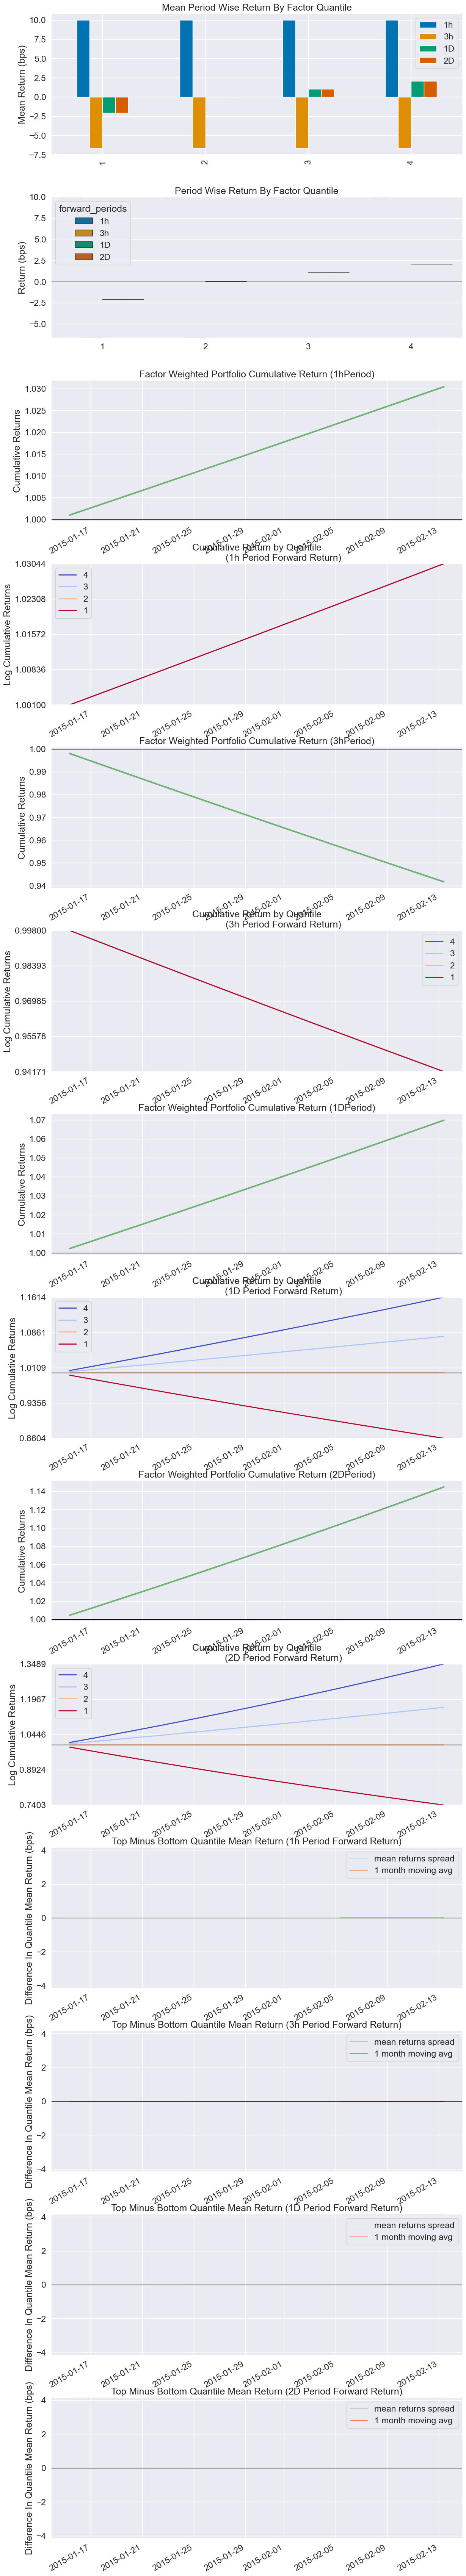

Information Analysis


/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/performance.py:59: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  .apply(lambda x: stats.spearmanr(x, f)[0])
/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:635: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return result_to_tuple(hypotest_fun_out(*samples, **kwds))
/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/shape_base.py:402: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))
/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/shape_base.py:402: RuntimeWarning: Precision loss 

1h     3h   1D   2D
IC Mean           0.005 -0.109  1.0  1.0
IC Std.           0.441  0.500  0.0  0.0
Risk-Adjusted IC  0.012 -0.217  inf  inf
t-stat(IC)          NaN    NaN  inf  inf
p-value(IC)         NaN    NaN  0.0  0.0
IC Skew             NaN    NaN  NaN  NaN
IC Kurtosis         NaN    NaN  NaN  NaN

/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:282: RuntimeWarning: invalid value encountered in divide
  return (self.sorted_data - self.loc) / self.scale
/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/performance.py:59: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  .apply(lambda x: stats.spearmanr(x, f)[0])


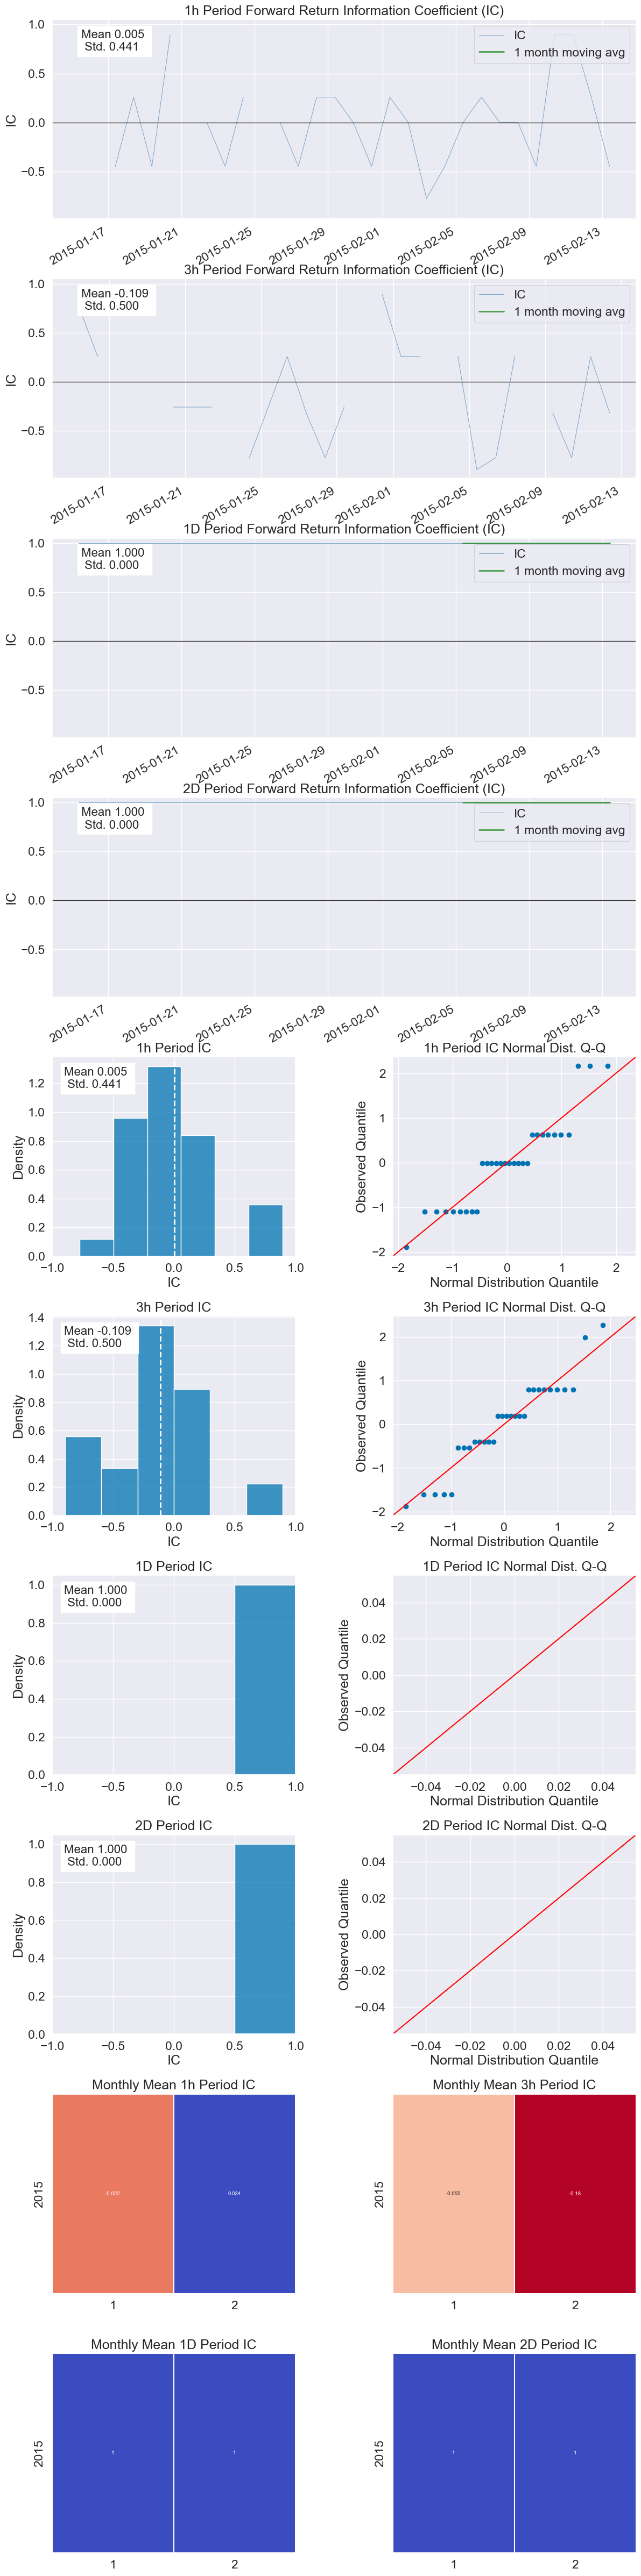

Turnover Analysis


/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/utils.py:915: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn("Skipping return periods that aren't exact multiples of days.")


1D     2D
Quantile 1 Mean Turnover   0.000  0.000
Quantile 2 Mean Turnover   0.241  0.393
Quantile 3 Mean Turnover   0.000  0.000
Quantile 4 Mean Turnover   0.241  0.393

1D   2D
Mean Factor Rank Autocorrelation  1.0  1.0

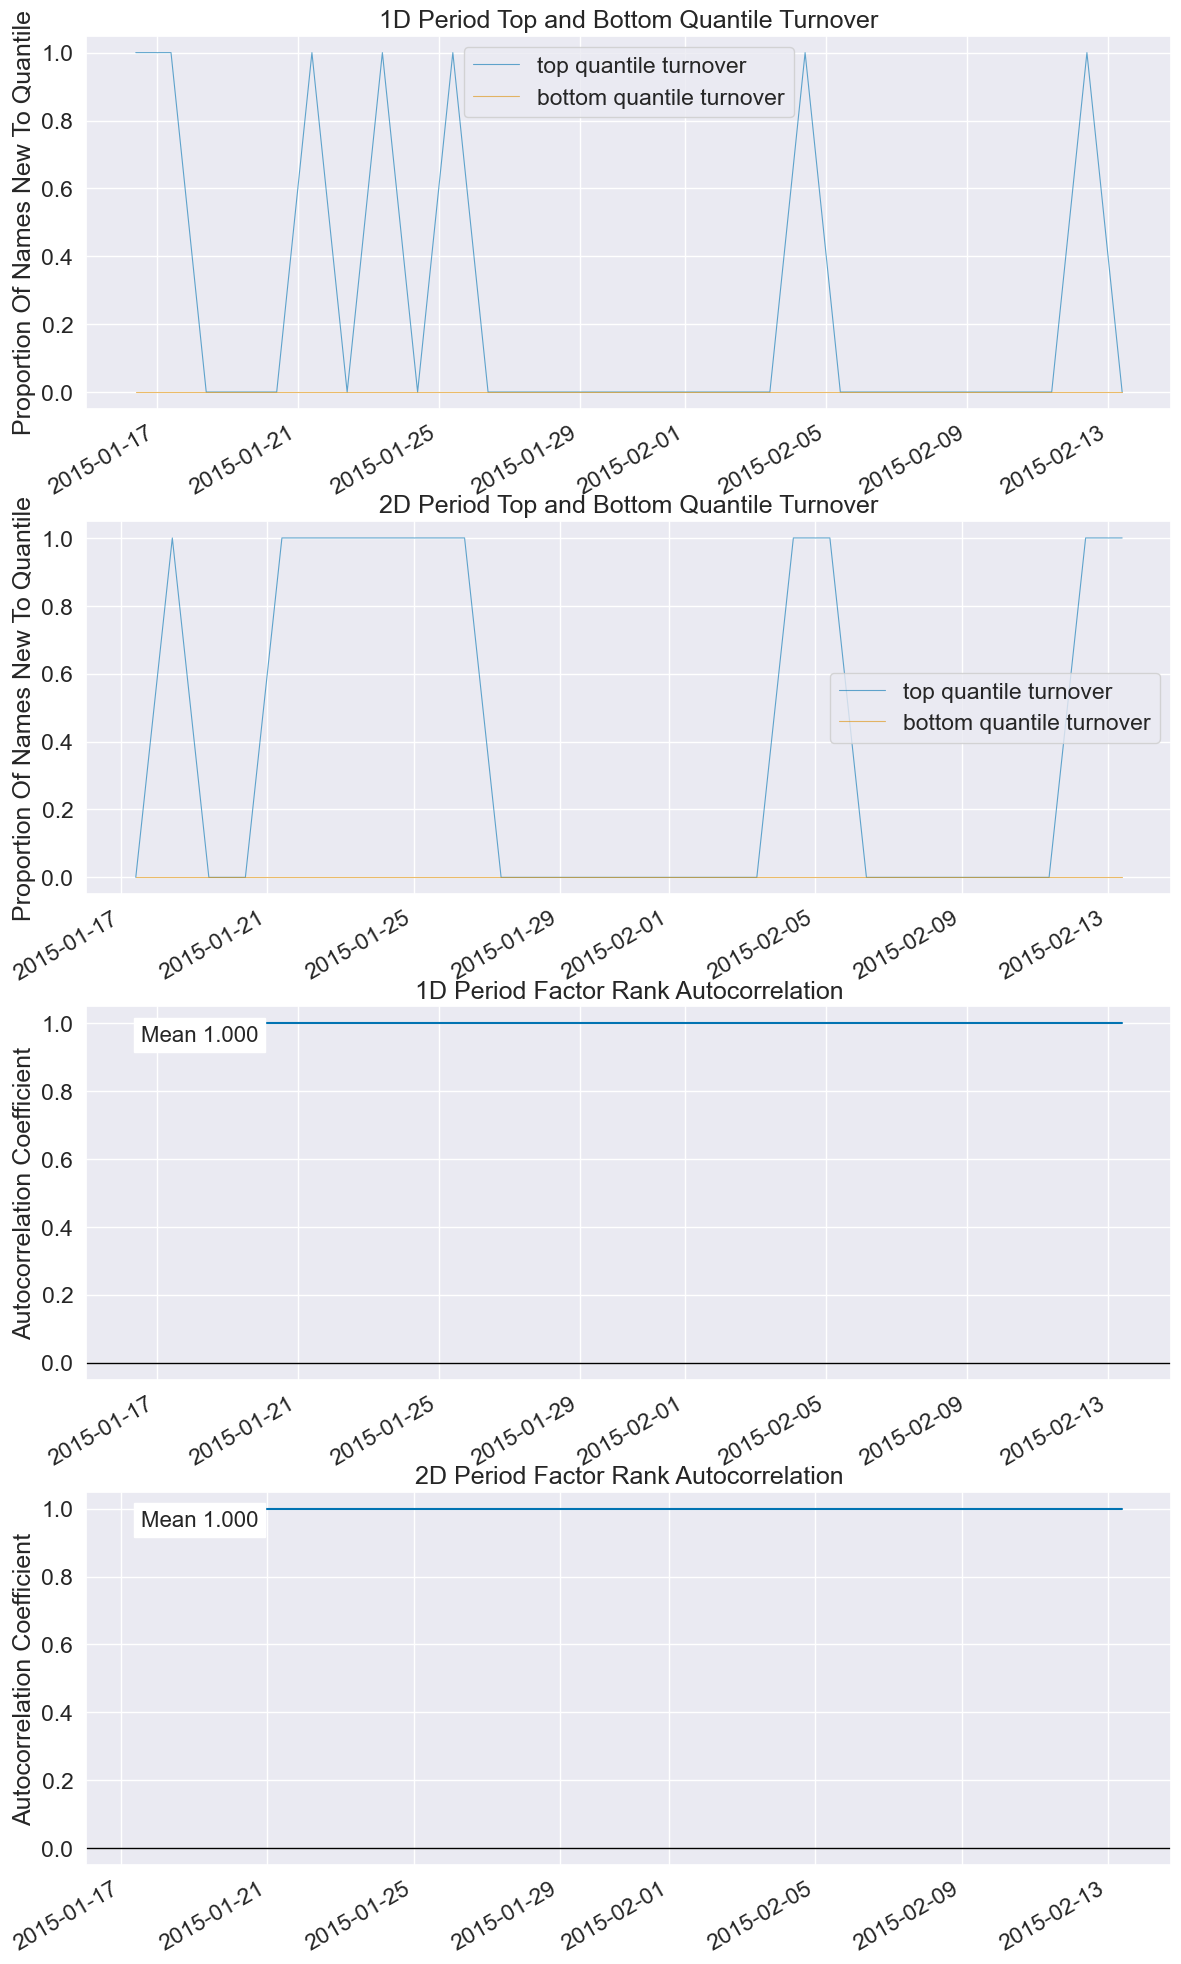

series =             D
-3  0.975249
-2  0.976224
-1  0.973298
0   0.970373
1   0.971343
2   0.968432
3   0.965521
4   0.966486
5   0.963590
6   0.960693
7   0.961654
8   0.958772
9   0.955890
10  0.956845
11  0.953978
series =             D
-3  0.970373
-2  0.971343
-1  0.968432
0   0.965521
1   0.966486
2   0.963590
3   0.960693
4   0.961654
5   0.958772
6   0.955890
7   0.956845
8   0.953978
9   0.951110
10  0.952061
11  0.949208
series =             D
-3  0.965521
-2  0.966486
-1  0.963590
0   0.960693
1   0.961654
2   0.958772
3   0.955890
4   0.956845
5   0.953978
6   0.951110
7   0.952061
8   0.949208
9   0.946355
10  0.947301
11  0.944462
series =             D
-3  0.960693
-2  0.961654
-1  0.958772
0   0.955890
1   0.956845
2   0.953978
3   0.951110
4   0.952061
5   0.949208
6   0.946355
7   0.947301
8   0.944462
9   0.941623
10  0.942564
11  0.939740
series =             D
-3  0.955890
-2  0.956845
-1  0.953978
0   0.951110
1   0.952061
2   0.949208
3   0.946355
4   0.947301
5

<Figure size 640x480 with 0 Axes>

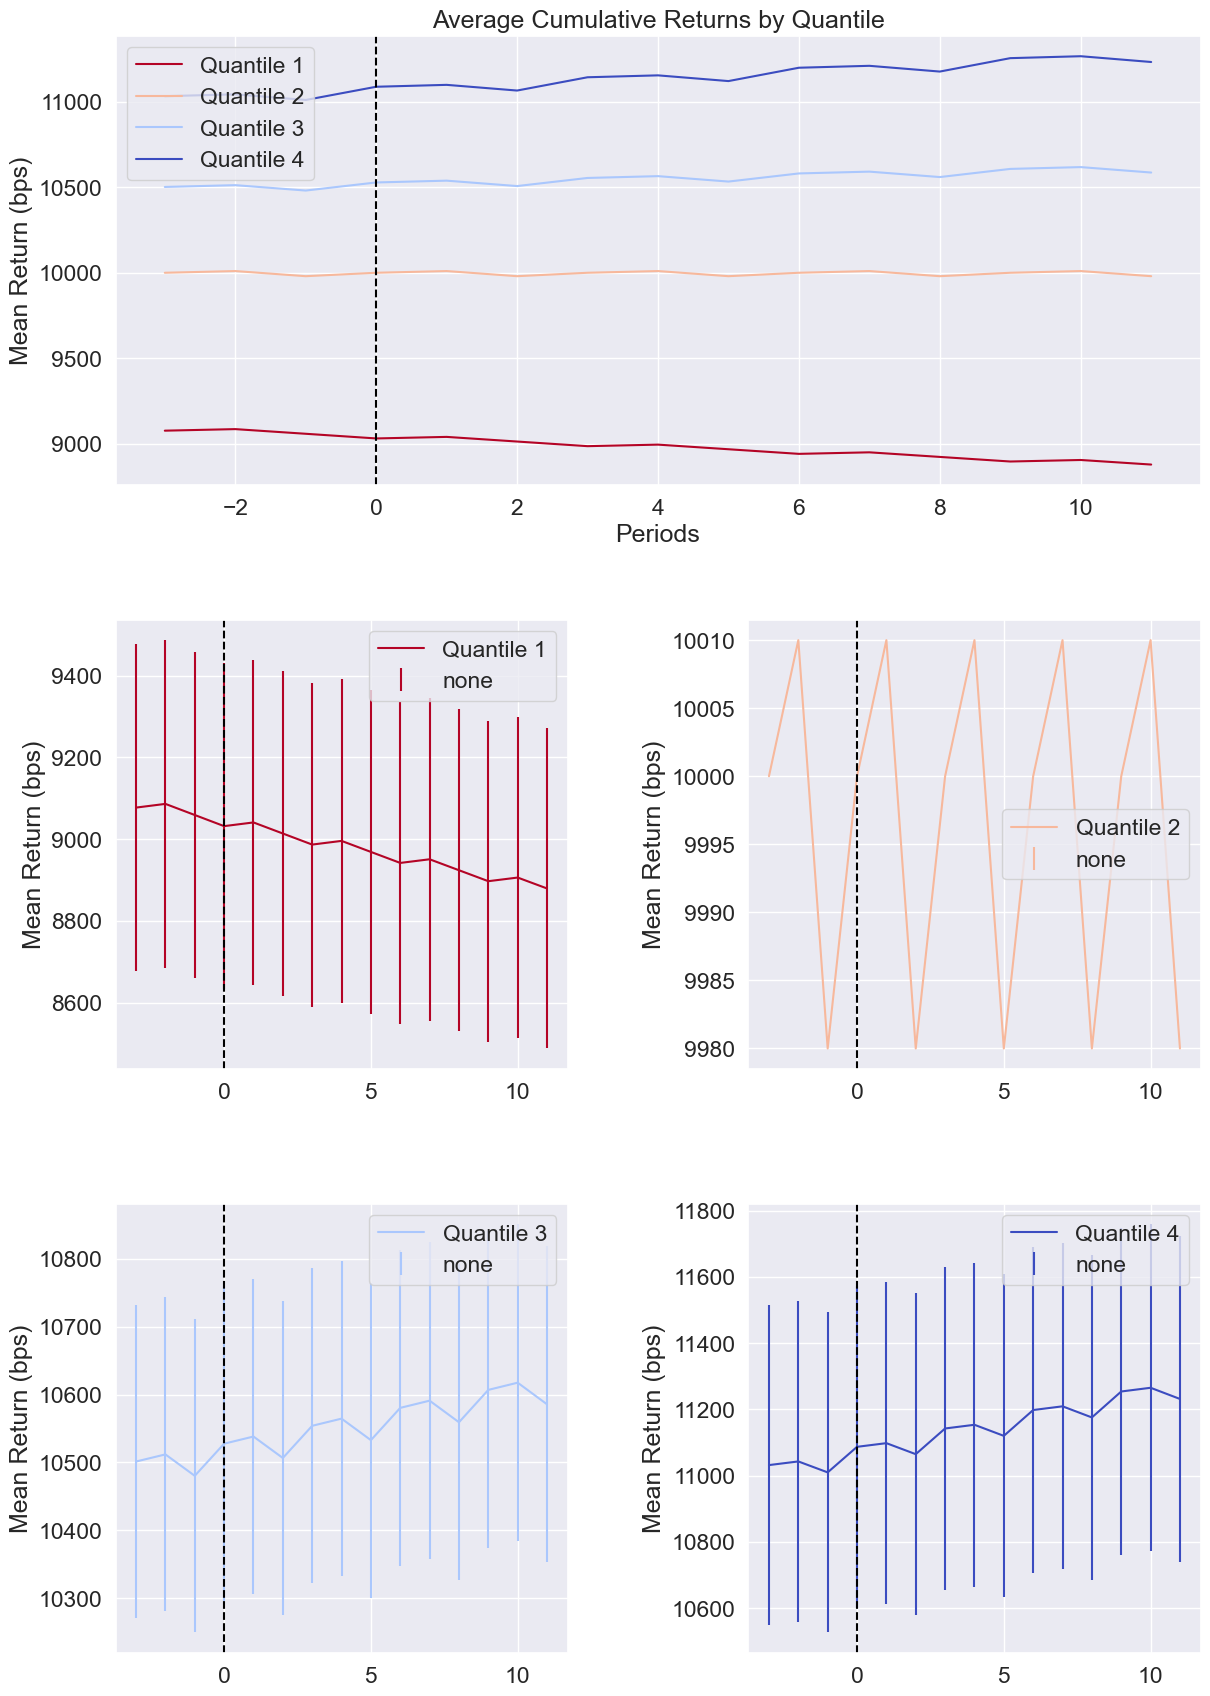

In [12]:
create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=False, group_neutral=False, by_group=False)
plt.show()

factor_data =                                1h     3h      1D        2D  factor  \
date                asset                                           
2015-01-15 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0   
                    B      0.001 -0.002  0.0050  0.010025     4.0   
                    C      0.001 -0.002  0.0000  0.000000     2.0   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0   
2015-01-16 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0   
...                          ...    ...     ...       ...     ...   
2015-02-12 09:30:00 F      0.001 -0.002  0.0000  0.000000     2.0   
2015-02-13 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0   
                    E      0.001 -0.002  0.0050  0.010025     4.0   
                    F      0.001 -0.002  0.0000  0.000000     2.0   

                           factor_quantile  
date                asset                 

min  max  mean  std  count  count %
factor_quantile                                     
1.0              1.0  1.0   1.0  0.0     30     25.0
2.0              2.0  2.0   2.0  0.0     30     25.0
3.0              3.0  3.0   3.0  0.0     30     25.0
4.0              4.0  4.0   4.0  0.0     30     25.0

Returns Analysis


1h   3h     1D     2D
Ann. alpha                                     0.0  0.0  1.778  1.772
beta                                           0.0  0.0  0.000  0.000
Mean Period Wise Return Top Quantile (bps)     0.0  0.0  1.819  1.817
Mean Period Wise Return Bottom Quantile (bps)  0.0  0.0 -2.350 -2.354
Mean Period Wise Spread (bps)                 -0.0  0.0  4.169  4.172

/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/plotting.py:572: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(ylabel='Difference In Quantile Mean Return (bps)',


<Figure size 640x480 with 0 Axes>

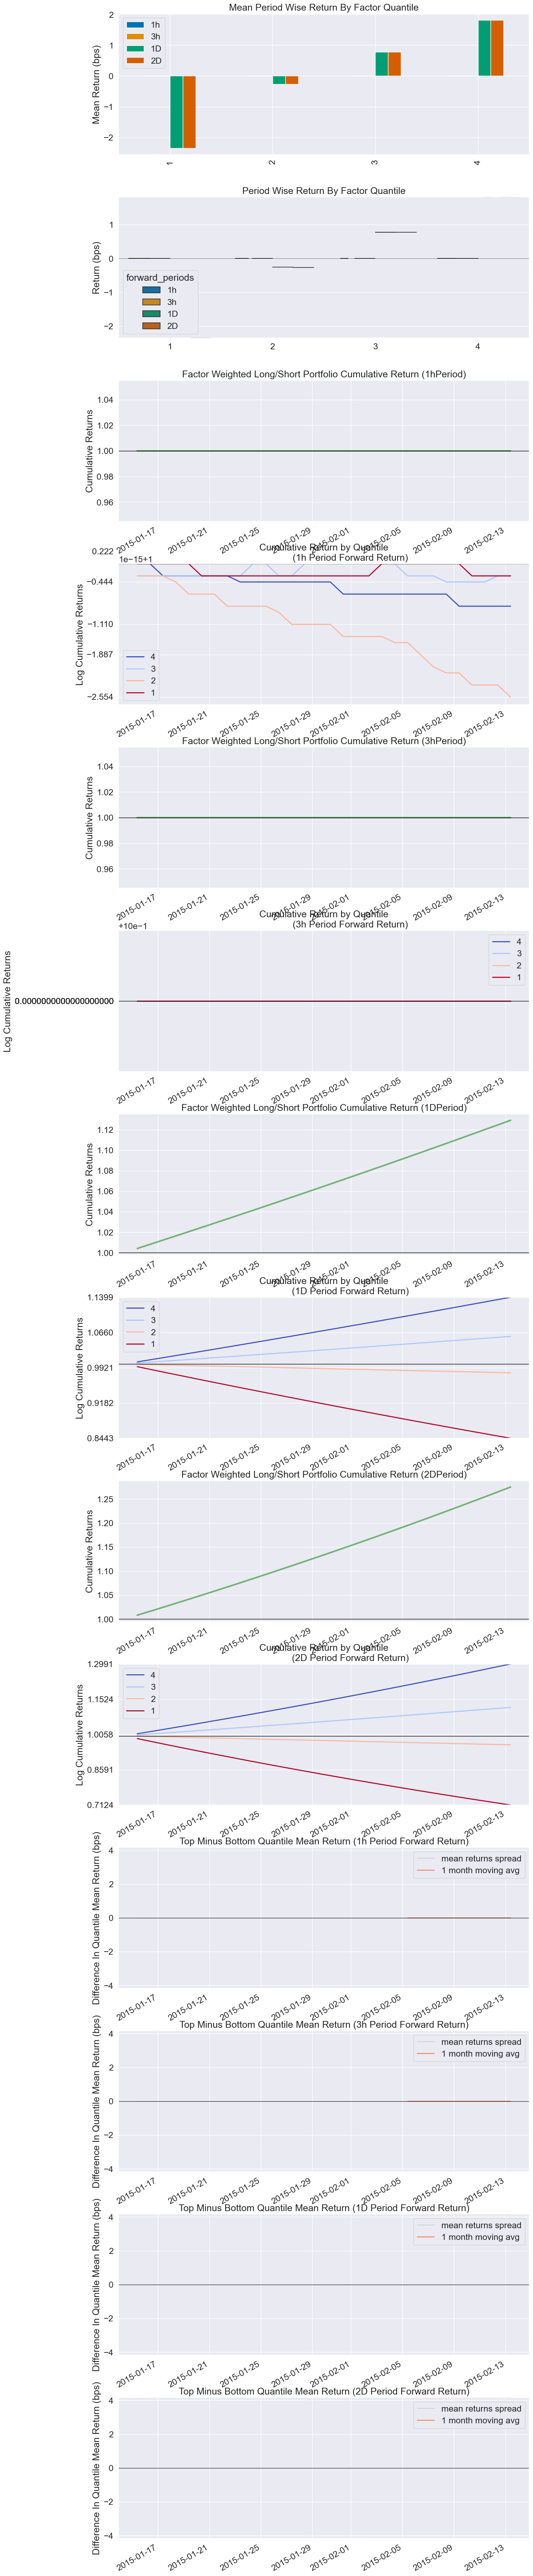

/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/plotting.py:406: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for a, (sc, cor) in zip(ax, mean_ret_by_q.groupby(level='group')):


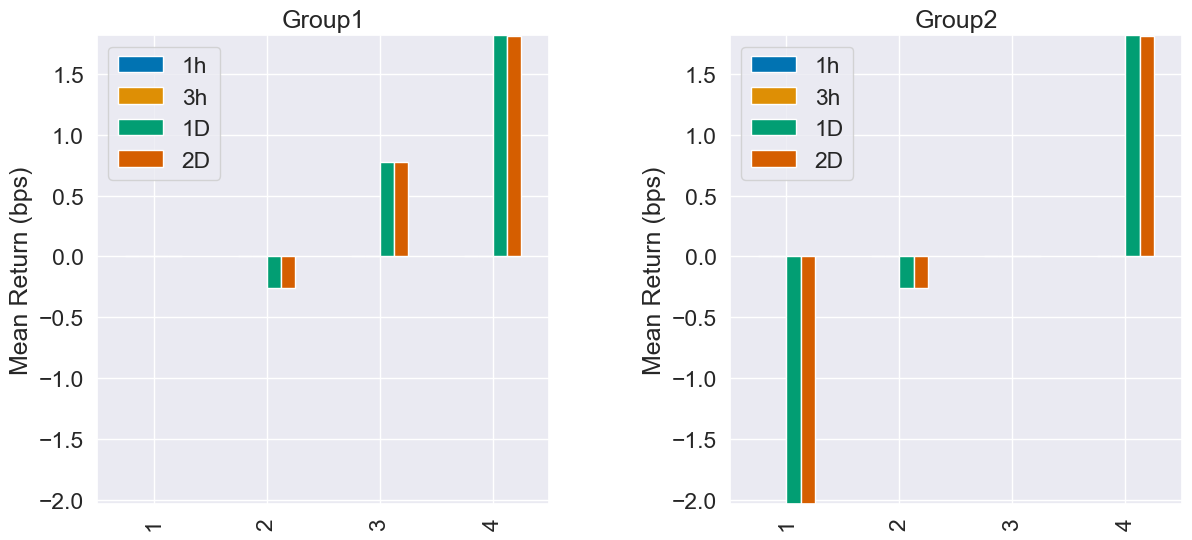

Information Analysis


/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/performance.py:59: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  .apply(lambda x: stats.spearmanr(x, f)[0])
/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:635: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return result_to_tuple(hypotest_fun_out(*samples, **kwds))
/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/shape_base.py:402: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))
/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/shape_base.py:402: RuntimeWarning: Precision loss 

1h     3h   1D   2D
IC Mean           0.005 -0.109  1.0  1.0
IC Std.           0.441  0.500  0.0  0.0
Risk-Adjusted IC  0.012 -0.217  inf  inf
t-stat(IC)          NaN    NaN  inf  inf
p-value(IC)         NaN    NaN  0.0  0.0
IC Skew             NaN    NaN  NaN  NaN
IC Kurtosis         NaN    NaN  NaN  NaN

/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:282: RuntimeWarning: invalid value encountered in divide
  return (self.sorted_data - self.loc) / self.scale
/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/performance.py:59: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  .apply(lambda x: stats.spearmanr(x, f)[0])


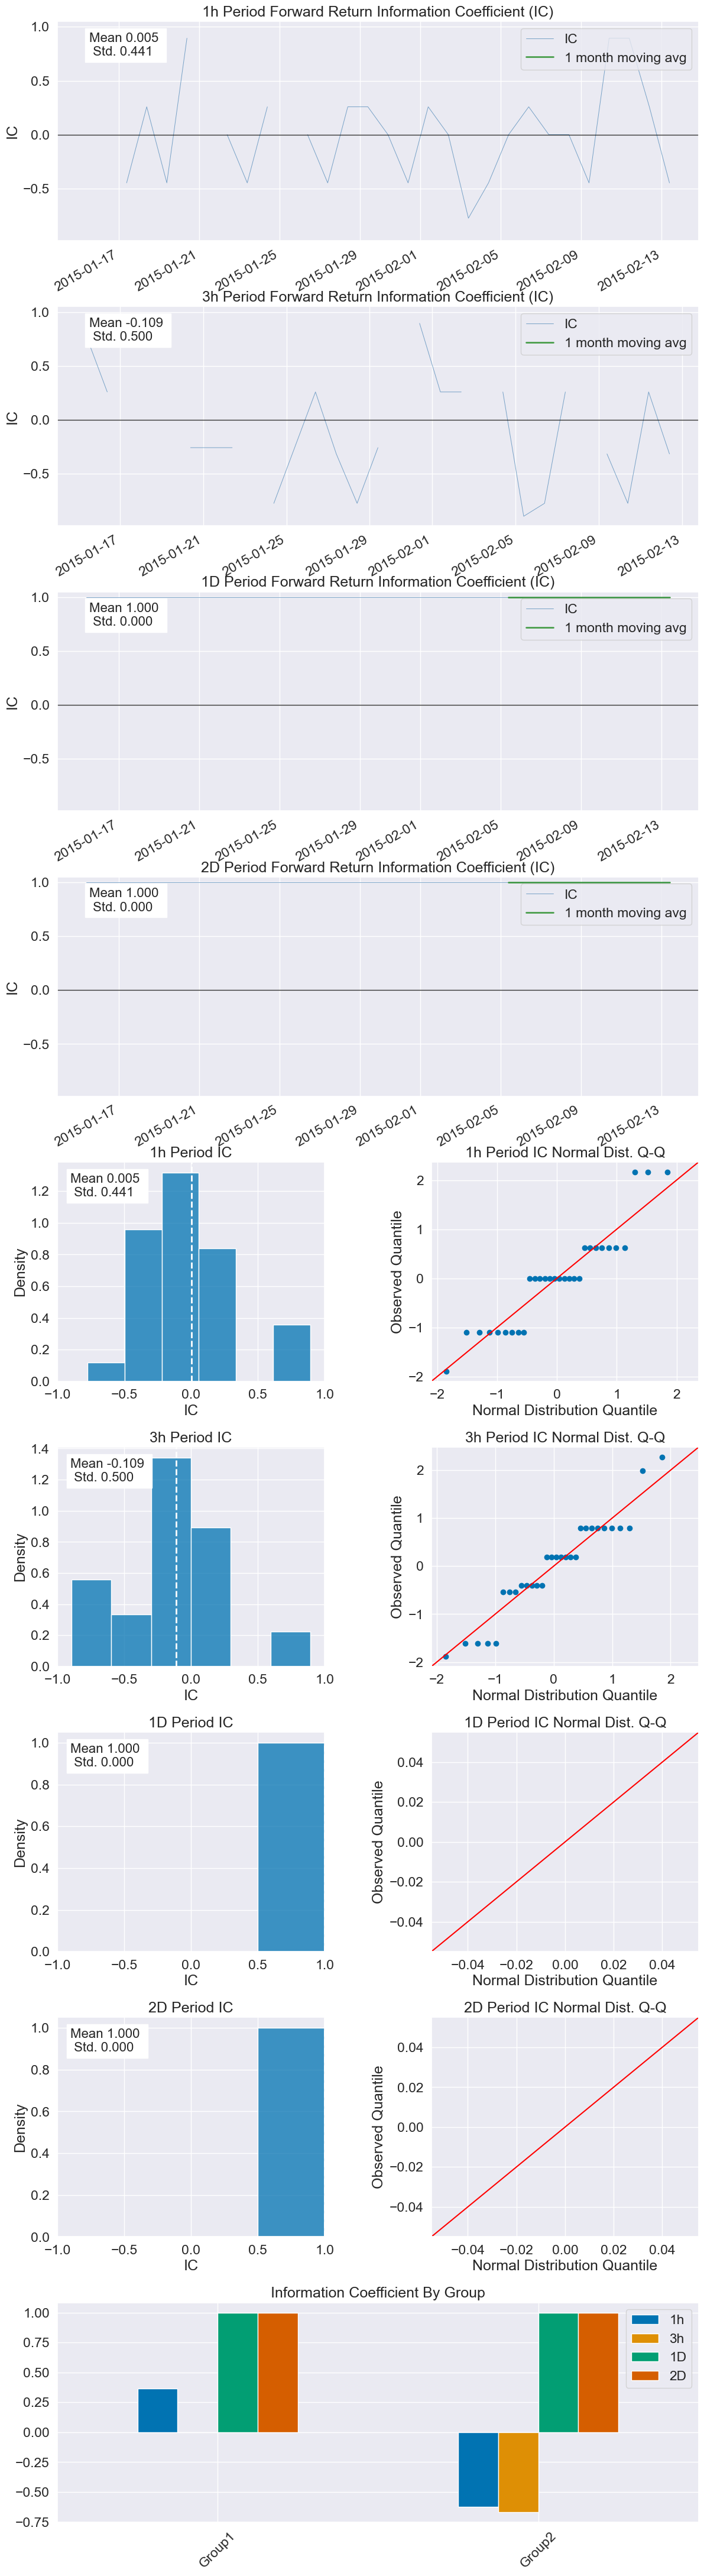

Turnover Analysis


/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/utils.py:915: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn("Skipping return periods that aren't exact multiples of days.")


1D     2D
Quantile 1 Mean Turnover   0.000  0.000
Quantile 2 Mean Turnover   0.241  0.393
Quantile 3 Mean Turnover   0.000  0.000
Quantile 4 Mean Turnover   0.241  0.393

1D   2D
Mean Factor Rank Autocorrelation  1.0  1.0

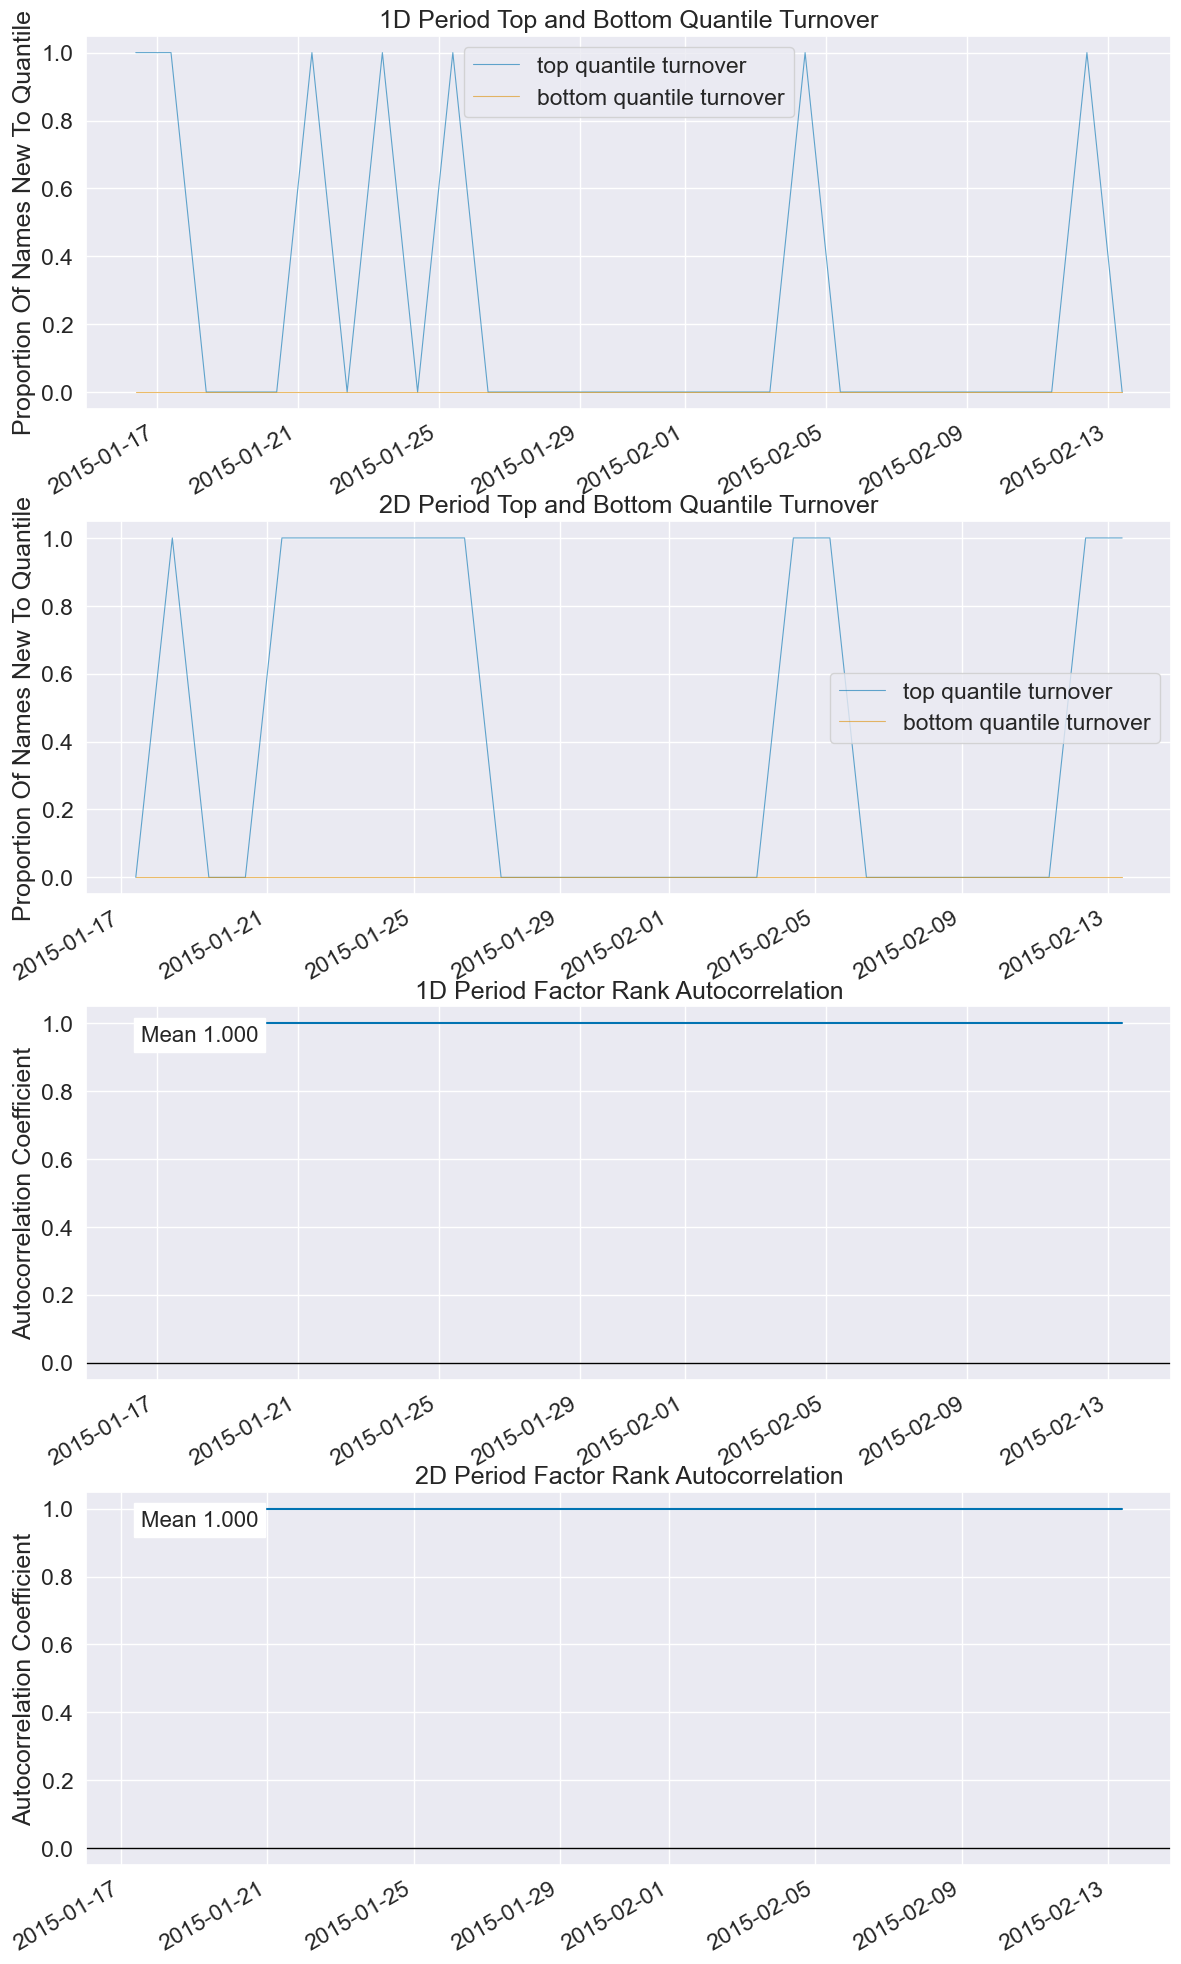

series =             A         D      C         B
-3  1.012563  0.975249  1.000  1.025251
-2  1.013575  0.976224  1.001  1.026277
-1  1.010538  0.973298  0.998  1.023201
0   1.015094  0.970373  1.000  1.030378
1   1.016109  0.971343  1.001  1.031408
2   1.013064  0.968432  0.998  1.028317
3   1.017632  0.965521  1.000  1.035529
4   1.018649  0.966486  1.001  1.036565
5   1.015597  0.963590  0.998  1.033458
6   1.020176  0.960693  1.000  1.040707
7   1.021196  0.961654  1.001  1.041748
8   1.018136  0.958772  0.998  1.038626
9   1.022726  0.955890  1.000  1.045911
10  1.023749  0.956845  1.001  1.046956
11  1.020681  0.953978  0.998  1.043819
series =             E      F         A         D
-3  1.030378  1.000  1.015094  0.970373
-2  1.031408  1.001  1.016109  0.971343
-1  1.028317  0.998  1.013064  0.968432
0   1.035529  1.000  1.017632  0.965521
1   1.036565  1.001  1.018649  0.966486
2   1.033458  0.998  1.015597  0.963590
3   1.040707  1.000  1.020176  0.960693
4   1.041748  1.001 

<Figure size 640x480 with 0 Axes>

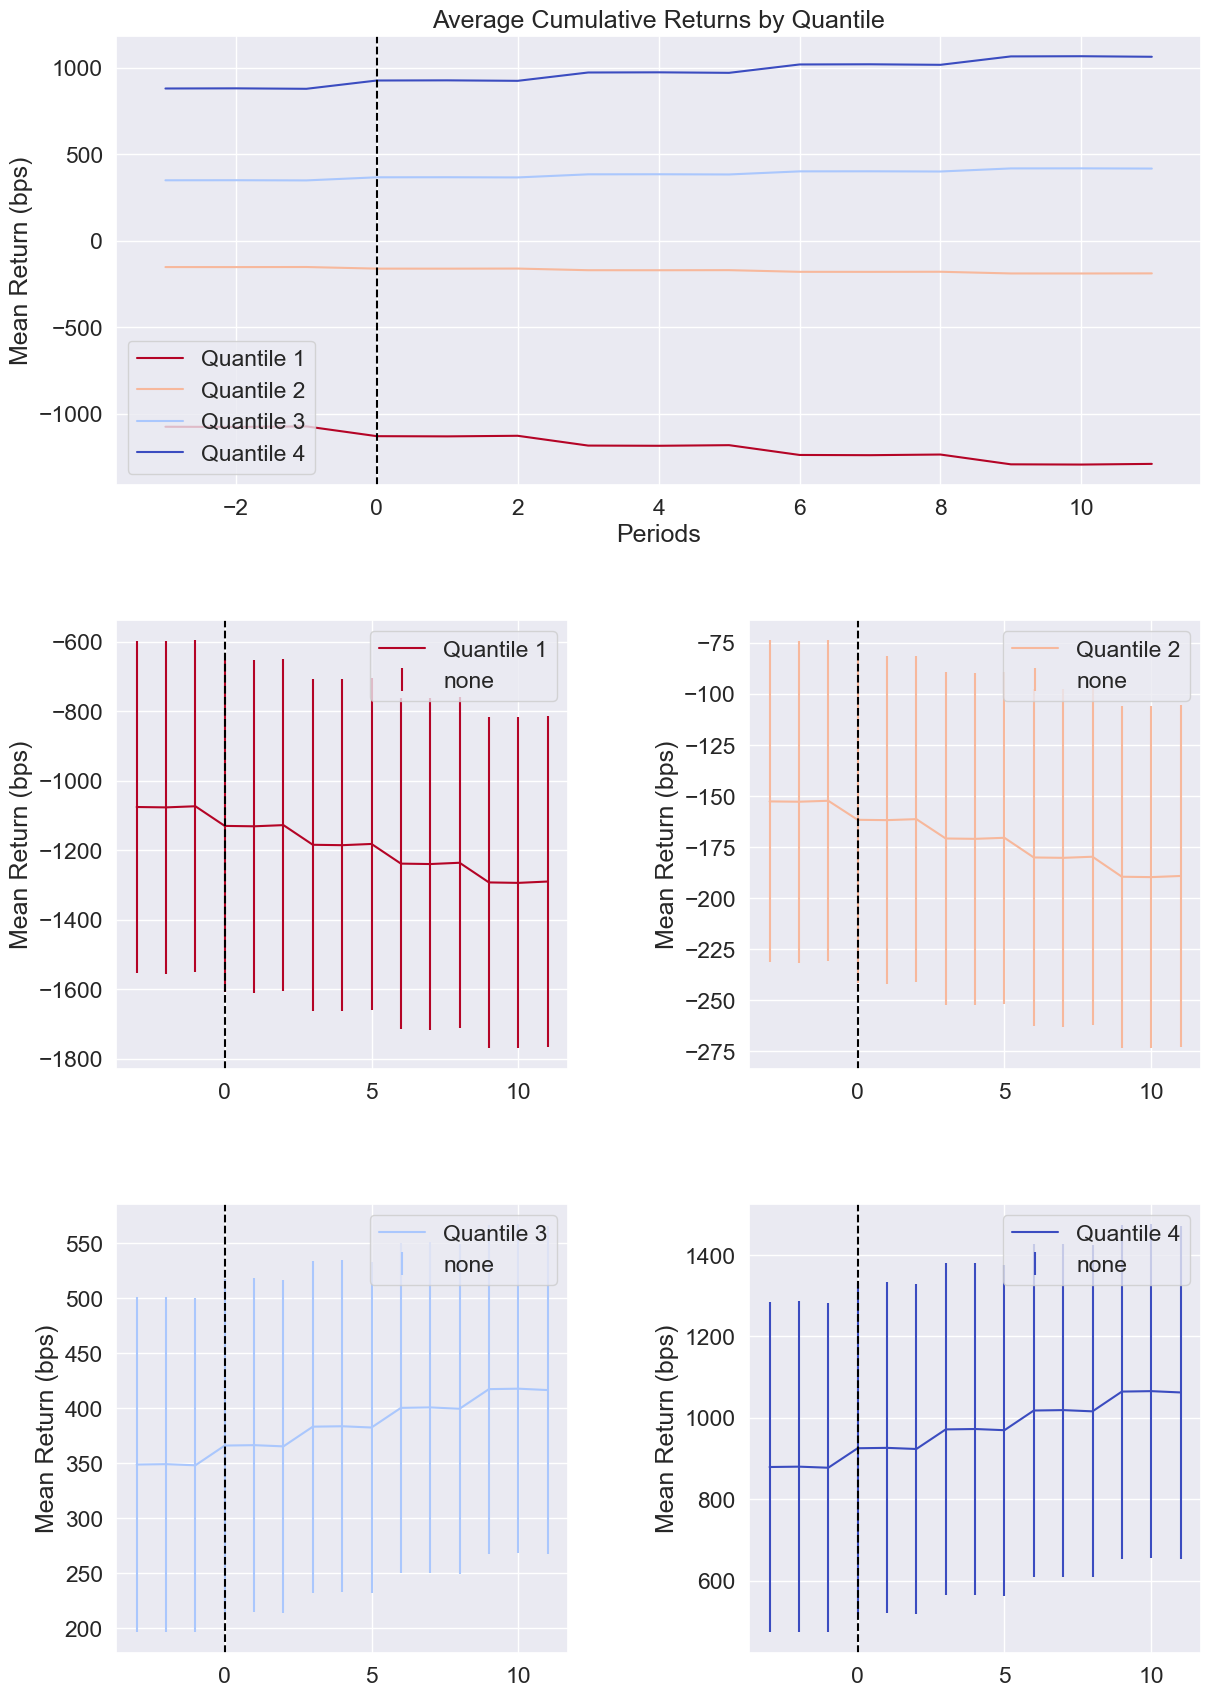

series =             A         D      C         B
-3  1.012563  0.975249  1.000  1.025251
-2  1.013575  0.976224  1.001  1.026277
-1  1.010538  0.973298  0.998  1.023201
0   1.015094  0.970373  1.000  1.030378
1   1.016109  0.971343  1.001  1.031408
2   1.013064  0.968432  0.998  1.028317
3   1.017632  0.965521  1.000  1.035529
4   1.018649  0.966486  1.001  1.036565
5   1.015597  0.963590  0.998  1.033458
6   1.020176  0.960693  1.000  1.040707
7   1.021196  0.961654  1.001  1.041748
8   1.018136  0.958772  0.998  1.038626
9   1.022726  0.955890  1.000  1.045911
10  1.023749  0.956845  1.001  1.046956
11  1.020681  0.953978  0.998  1.043819
series =             A         D      C         B
-3  1.017632  0.965521  1.000  1.035529
-2  1.018649  0.966486  1.001  1.036565
-1  1.015597  0.963590  0.998  1.033458
0   1.020176  0.960693  1.000  1.040707
1   1.021196  0.961654  1.001  1.041748
2   1.018136  0.958772  0.998  1.038626
3   1.022726  0.955890  1.000  1.045911
4   1.023749  0.9568

/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/performance.py:992: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, g_data in factor_data.groupby('group'):


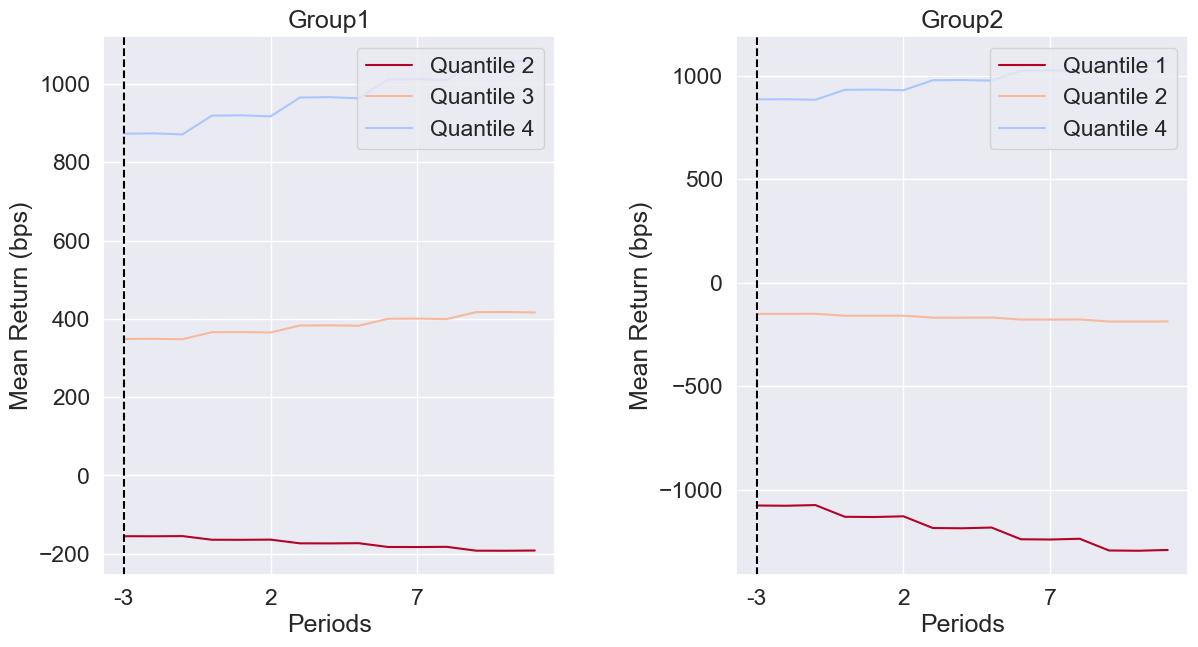

In [13]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=False, by_group=True)
plt.show()

factor_data =                                1h     3h      1D        2D  factor  \
date                asset                                           
2015-01-15 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0   
                    B      0.001 -0.002  0.0050  0.010025     4.0   
                    C      0.001 -0.002  0.0000  0.000000     2.0   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0   
2015-01-16 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0   
...                          ...    ...     ...       ...     ...   
2015-02-12 09:30:00 F      0.001 -0.002  0.0000  0.000000     2.0   
2015-02-13 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0   
                    E      0.001 -0.002  0.0050  0.010025     4.0   
                    F      0.001 -0.002  0.0000  0.000000     2.0   

                           factor_quantile  
date                asset                 

min  max  mean  std  count  count %
factor_quantile                                     
1.0              1.0  1.0   1.0  0.0     30     25.0
2.0              2.0  2.0   2.0  0.0     30     25.0
3.0              3.0  3.0   3.0  0.0     30     25.0
4.0              4.0  4.0   4.0  0.0     30     25.0

Returns Analysis


1h   3h     1D     2D
Ann. alpha                                     0.0  0.0  0.876  0.875
beta                                          -0.0  0.0  0.000  0.000
Mean Period Wise Return Top Quantile (bps)     0.0  0.0  1.300  1.299
Mean Period Wise Return Bottom Quantile (bps)  0.0  0.0 -1.565 -1.567
Mean Period Wise Spread (bps)                 -0.0  0.0  2.865  2.865

/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/plotting.py:572: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(ylabel='Difference In Quantile Mean Return (bps)',


<Figure size 640x480 with 0 Axes>

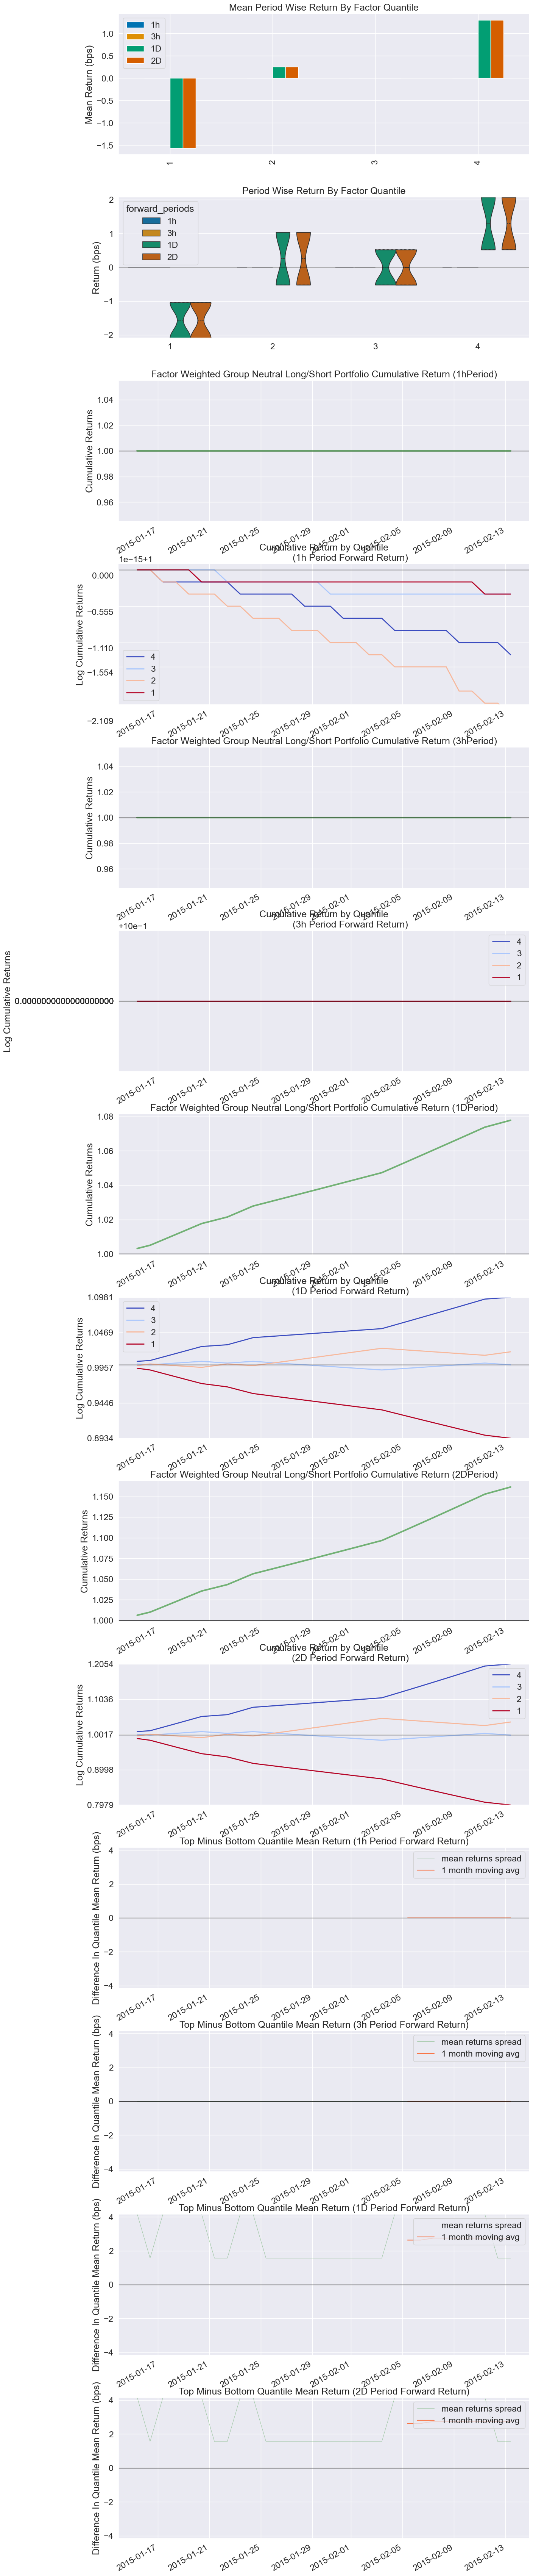

/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/plotting.py:406: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for a, (sc, cor) in zip(ax, mean_ret_by_q.groupby(level='group')):


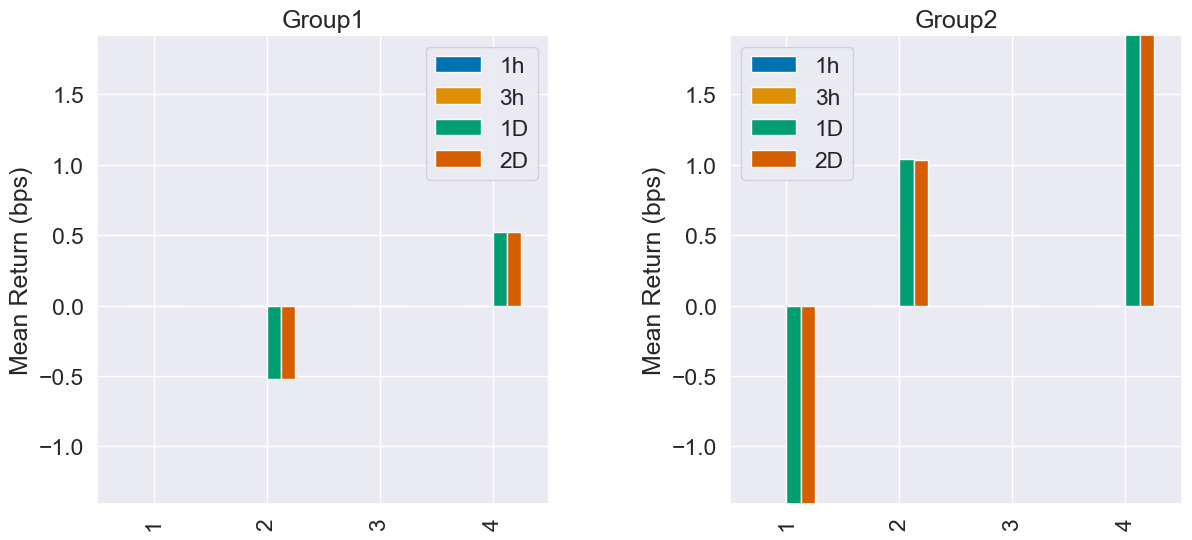

Information Analysis


/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/performance.py:59: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  .apply(lambda x: stats.spearmanr(x, f)[0])


1h     3h      1D      2D
IC Mean          -0.066 -0.147   0.700   0.700
IC Std.           0.462  0.522   0.305   0.305
Risk-Adjusted IC -0.144 -0.282   2.294   2.294
t-stat(IC)          NaN    NaN  12.565  12.565
p-value(IC)         NaN    NaN   0.000   0.000
IC Skew             NaN    NaN   0.000   0.000
IC Kurtosis         NaN    NaN  -2.000  -2.000

/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/performance.py:59: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  .apply(lambda x: stats.spearmanr(x, f)[0])


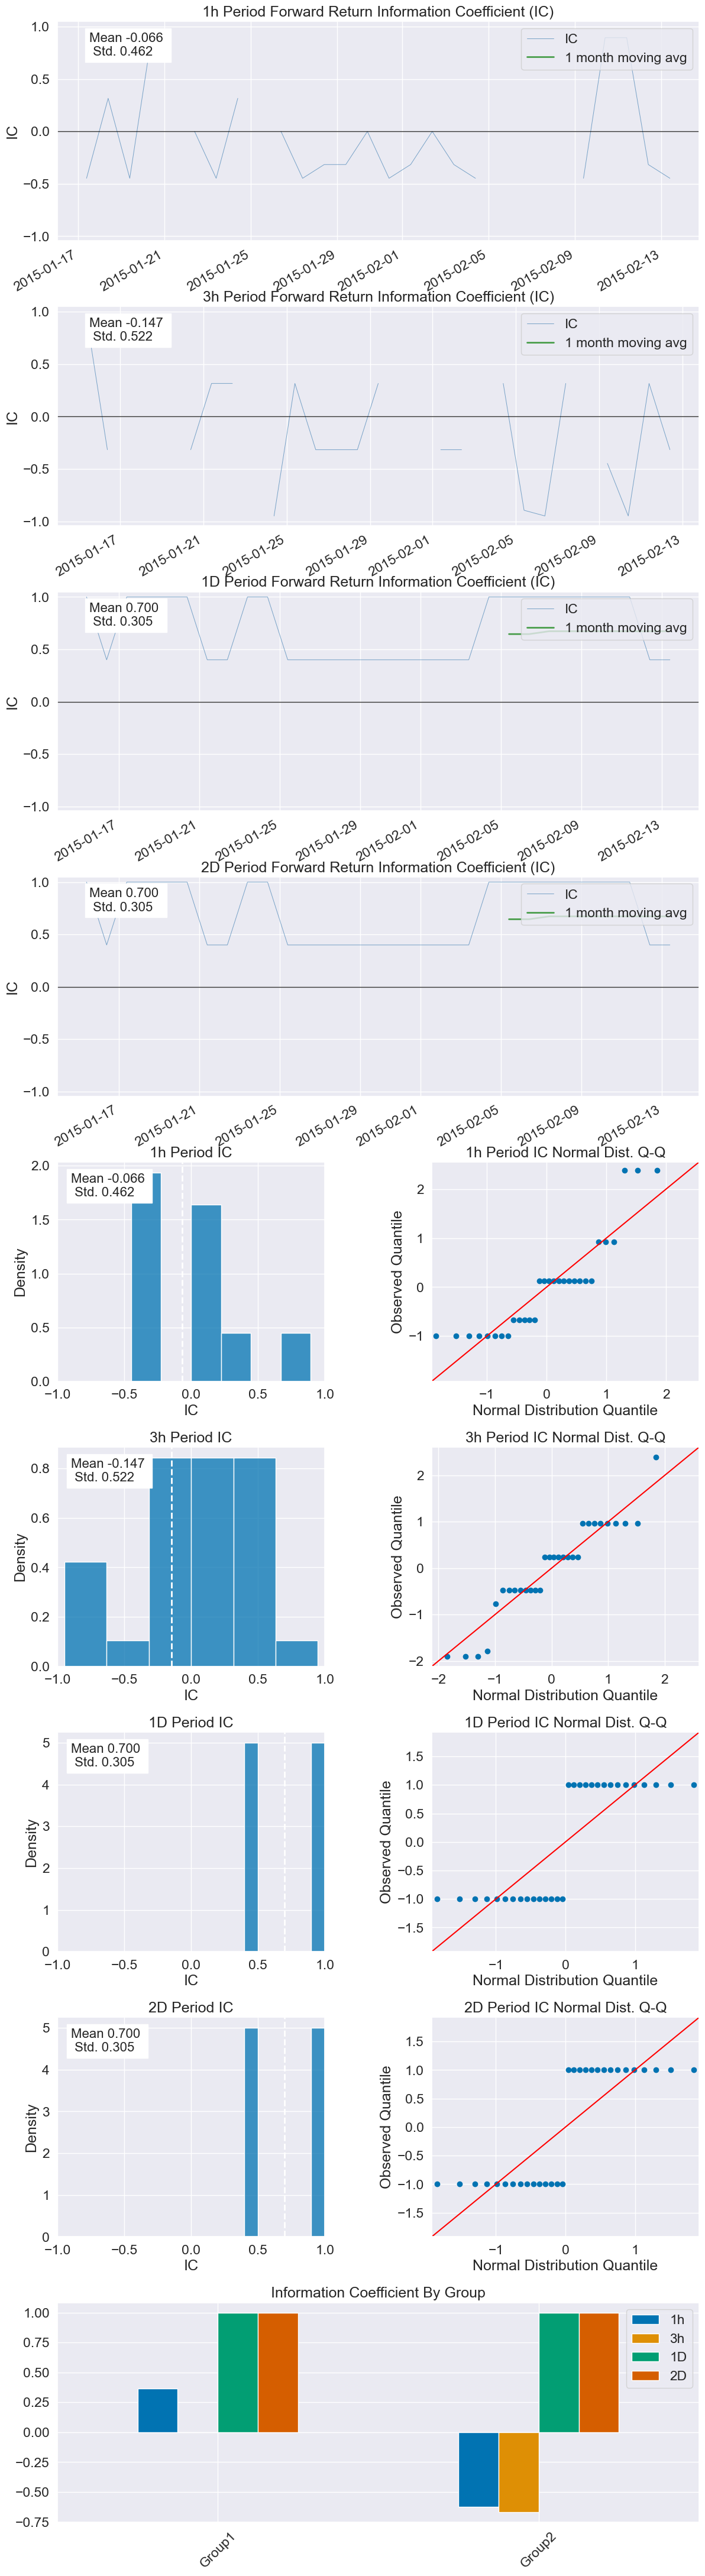

Turnover Analysis


/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/utils.py:915: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn("Skipping return periods that aren't exact multiples of days.")


1D     2D
Quantile 1 Mean Turnover   0.000  0.000
Quantile 2 Mean Turnover   0.241  0.393
Quantile 3 Mean Turnover   0.000  0.000
Quantile 4 Mean Turnover   0.241  0.393

1D   2D
Mean Factor Rank Autocorrelation  1.0  1.0

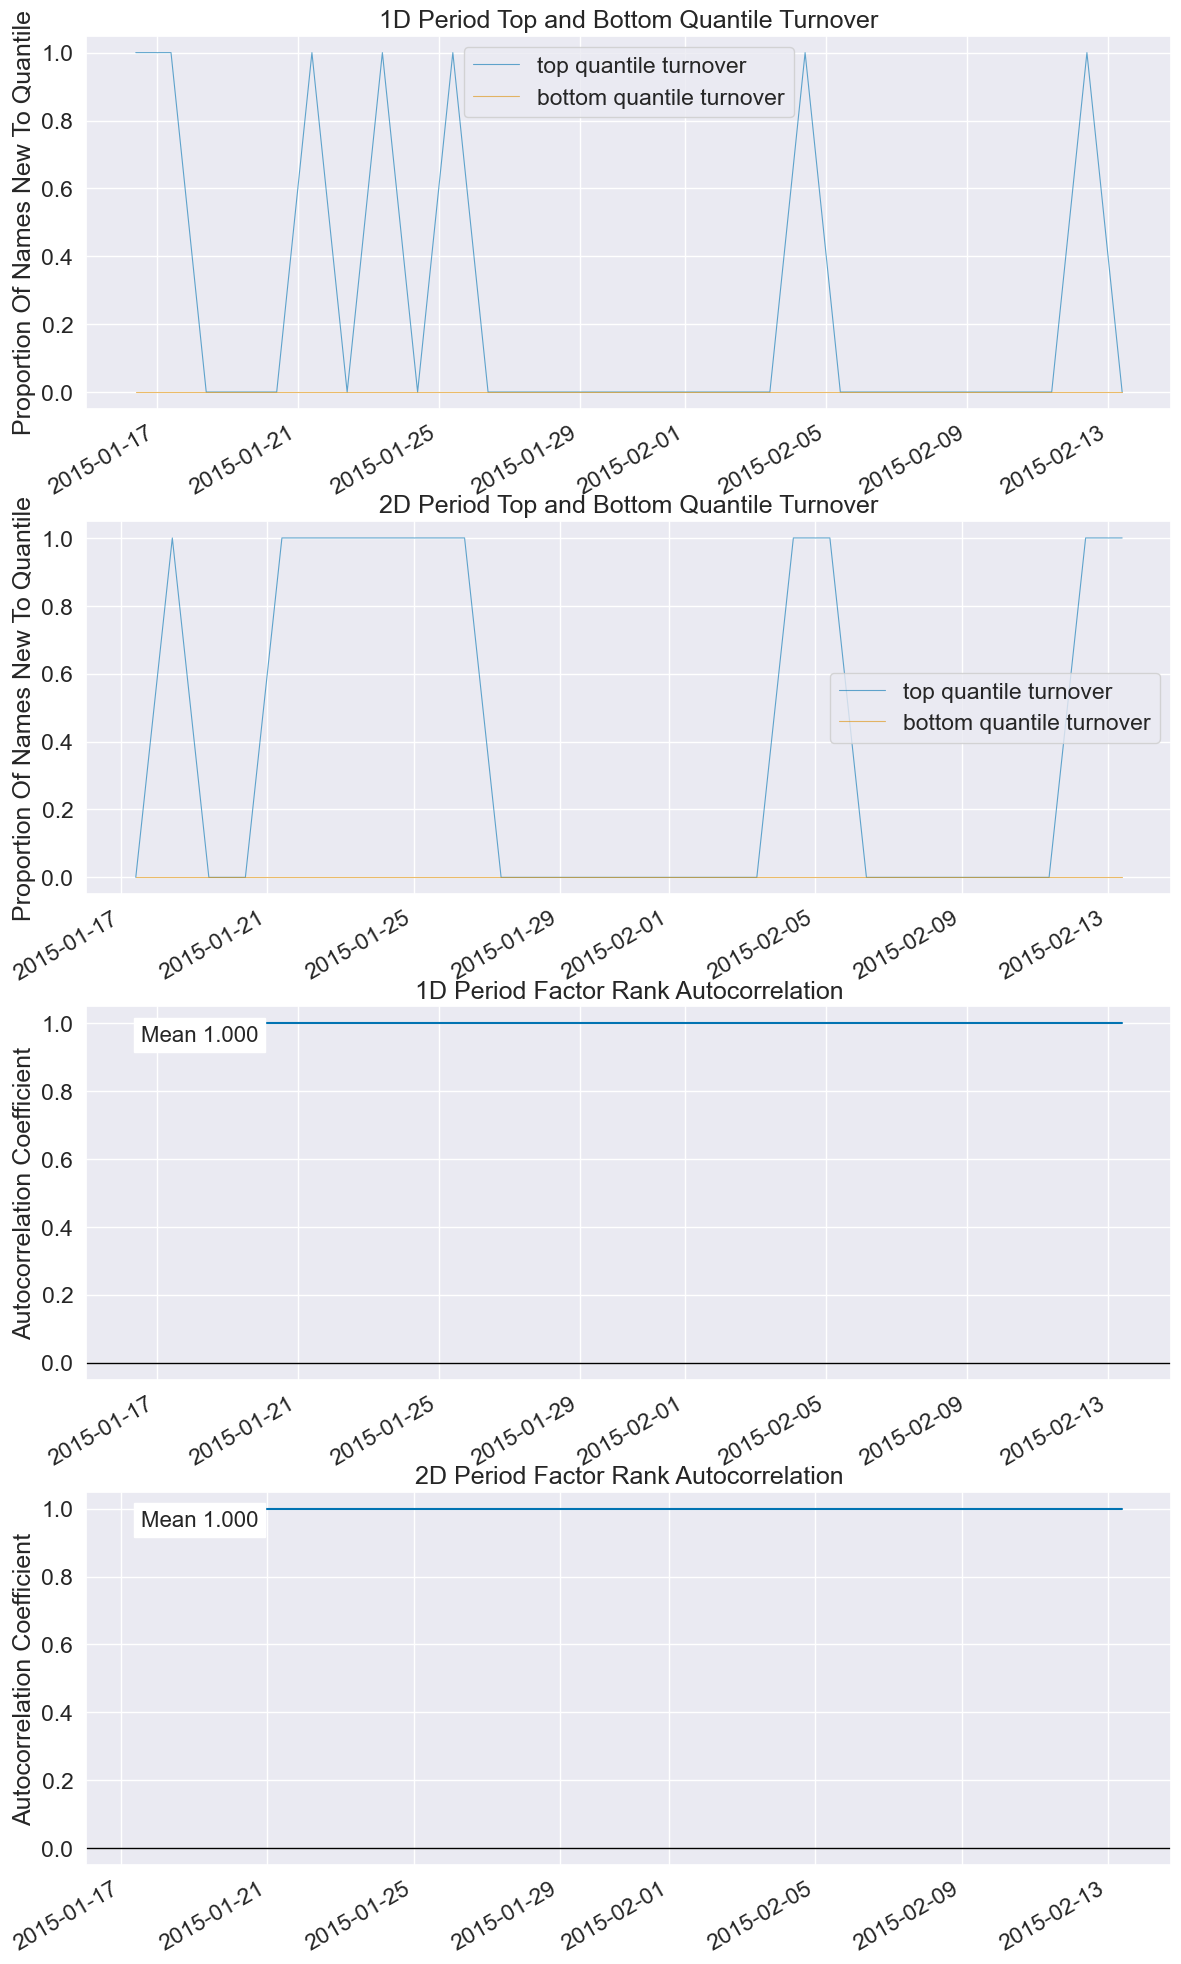

series =          C         A
-3  1.000  1.012563
-2  1.001  1.013575
-1  0.998  1.010538
0   1.000  1.015094
1   1.001  1.016109
2   0.998  1.013064
3   1.000  1.017632
4   1.001  1.018649
5   0.998  1.015597
6   1.000  1.020176
7   1.001  1.021196
8   0.998  1.018136
9   1.000  1.022726
10  1.001  1.023749
11  0.998  1.020681
series =          C         A
-3  1.000  1.017632
-2  1.001  1.018649
-1  0.998  1.015597
0   1.000  1.020176
1   1.001  1.021196
2   0.998  1.018136
3   1.000  1.022726
4   1.001  1.023749
5   0.998  1.020681
6   1.000  1.025283
7   1.001  1.026308
8   0.998  1.023233
9   1.000  1.027846
10  1.001  1.028874
11  0.998  1.025791
series =          C         A
-3  1.000  1.020176
-2  1.001  1.021196
-1  0.998  1.018136
0   1.000  1.022726
1   1.001  1.023749
2   0.998  1.020681
3   1.000  1.025283
4   1.001  1.026308
5   0.998  1.023233
6   1.000  1.027846
7   1.001  1.028874
8   0.998  1.025791
9   1.000  1.030416
10  1.001  1.031446
11  0.998  1.028355
series =  

/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/performance.py:1024: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, g_data in factor_data.groupby('group'):
/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/performance.py:1033: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  return q_returns.unstack(level=1).stack(level=0)


<Figure size 640x480 with 0 Axes>

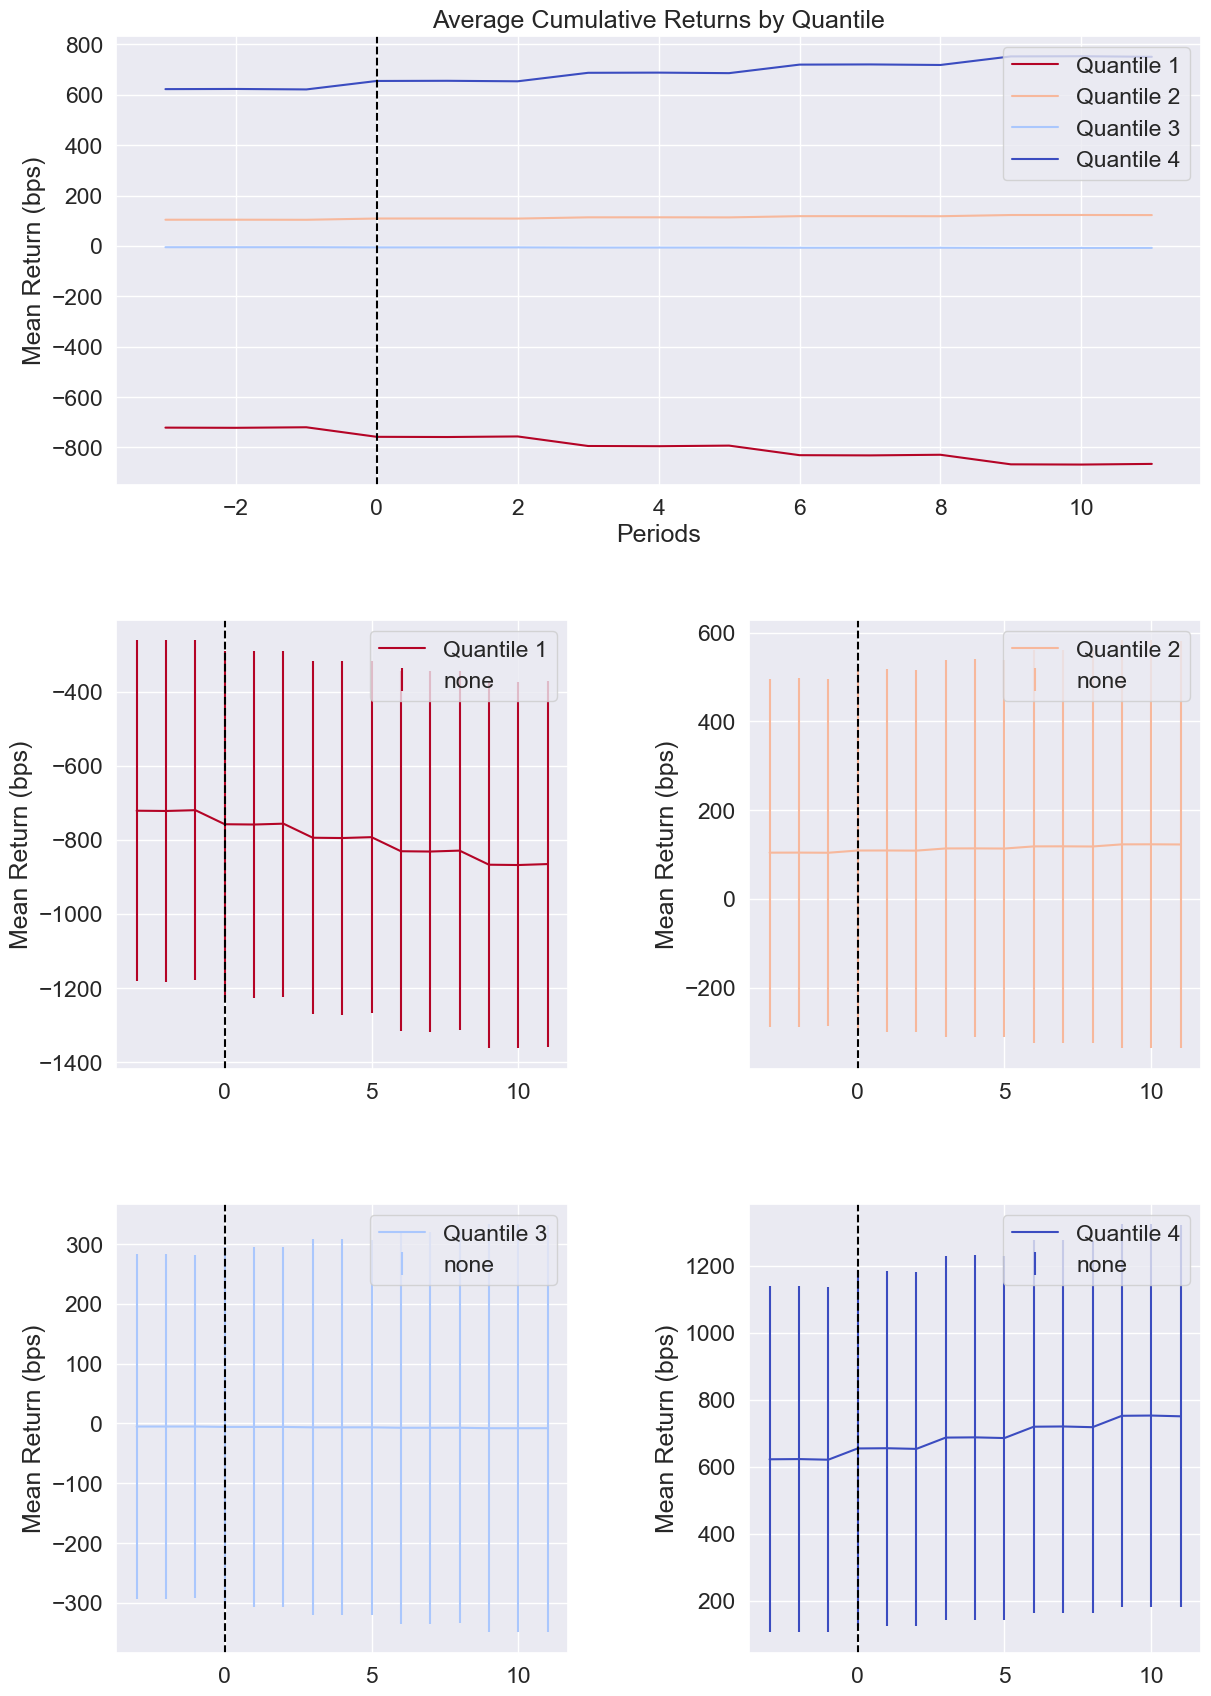

/Users/yunjinqi/opt/anaconda3/lib/python3.11/site-packages/alphalens/performance.py:992: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, g_data in factor_data.groupby('group'):


series =          C         A
-3  1.000  1.012563
-2  1.001  1.013575
-1  0.998  1.010538
0   1.000  1.015094
1   1.001  1.016109
2   0.998  1.013064
3   1.000  1.017632
4   1.001  1.018649
5   0.998  1.015597
6   1.000  1.020176
7   1.001  1.021196
8   0.998  1.018136
9   1.000  1.022726
10  1.001  1.023749
11  0.998  1.020681
series =          C         A
-3  1.000  1.017632
-2  1.001  1.018649
-1  0.998  1.015597
0   1.000  1.020176
1   1.001  1.021196
2   0.998  1.018136
3   1.000  1.022726
4   1.001  1.023749
5   0.998  1.020681
6   1.000  1.025283
7   1.001  1.026308
8   0.998  1.023233
9   1.000  1.027846
10  1.001  1.028874
11  0.998  1.025791
series =          C         A
-3  1.000  1.020176
-2  1.001  1.021196
-1  0.998  1.018136
0   1.000  1.022726
1   1.001  1.023749
2   0.998  1.020681
3   1.000  1.025283
4   1.001  1.026308
5   0.998  1.023233
6   1.000  1.027846
7   1.001  1.028874
8   0.998  1.025791
9   1.000  1.030416
10  1.001  1.031446
11  0.998  1.028355
series =  

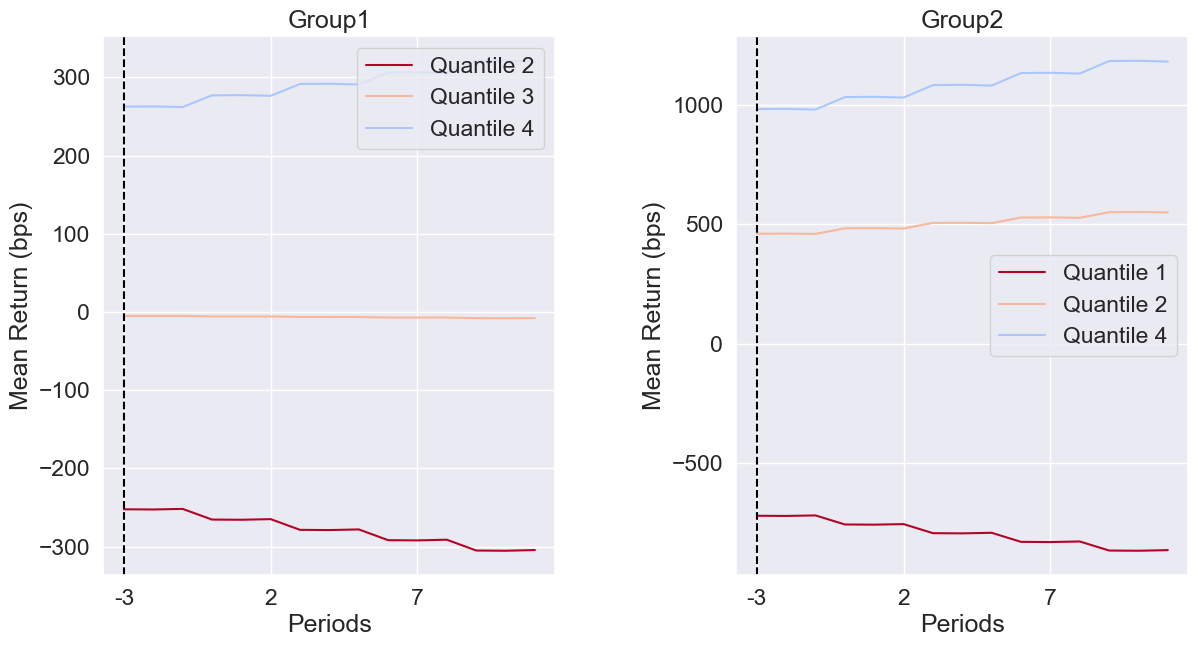

In [14]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=True, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=True, by_group=True)
plt.show()